In [ ]:
import os

#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
import tensorboard as tb
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#https://tensorboard.dev/experiment/kPpgC4ULReuQdD31OYz7TQ/#

experiment_id = "kPpgC4ULReuQdD31OYz7TQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df.head()

In [14]:
runs = df["run"].unique()
metrics = df["tag"].unique()
print(runs)
print(metrics)

['inception_network_0.10/train' 'inception_network_0.10/validation'
 'inception_network_0.11/train' 'inception_network_0.11/validation'
 'inception_network_0.12_norm/train'
 'inception_network_0.12_norm/validation'
 'inception_network_0.13_norm_small/train'
 'inception_network_0.13_norm_small/validation'
 'inception_network_0.14_norm_small_logcosh/train'
 'inception_network_0.14_norm_small_logcosh/validation'
 'inception_network_0.2/train' 'inception_network_0.2/validation'
 'inception_network_0.4/train' 'inception_network_0.4/validation'
 'inception_network_0.5/train' 'inception_network_0.6/train'
 'inception_network_0.6/validation' 'inception_network_0.7/validation'
 'inception_network_0.8/train' 'inception_network_0.8/validation'
 'inception_network_0.9/train' 'inception_network_0.9/validation'
 'inception_network_1.0/train' 'inception_network_1.0/validation'
 'inception_network_1.1_catcross/train'
 'inception_network_1.1_catcross/validation'
 'inception_network_1.2_catcross/train'


In [4]:
colors = sns.color_palette("Paired")
colors

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

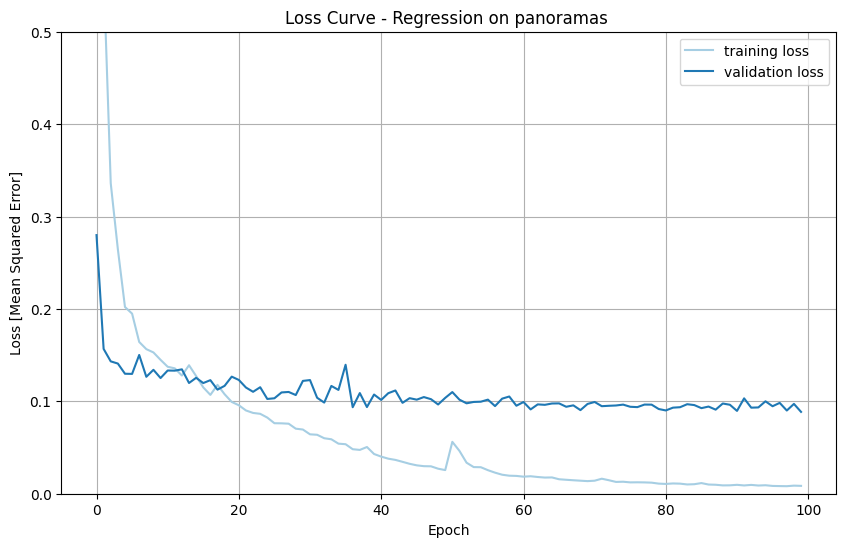

In [30]:
train = df[df.run.str.endswith("inception_network_0.12_norm/train")&(df.tag == "epoch_loss")]
validation = df[df.run.str.endswith("inception_network_0.12_norm/validation")&(df.tag == "epoch_loss")]
plt.figure(figsize=(10, 6))
sns.lineplot(data=train, x="step", y="value",color=colors[0],label = "training loss")
sns.lineplot(data=validation, x="step", y="value",color=colors[1], label = "validation loss")
plt.title("Loss Curve - Regression on panoramas ")
plt.xlabel("Epoch")
plt.ylabel("Loss [Mean Squared Error]")
plt.legend()
plt.grid()
plt.ylim(0,0.5)
plt.savefig("losscurve_regress_panos.png",dpi = 400)

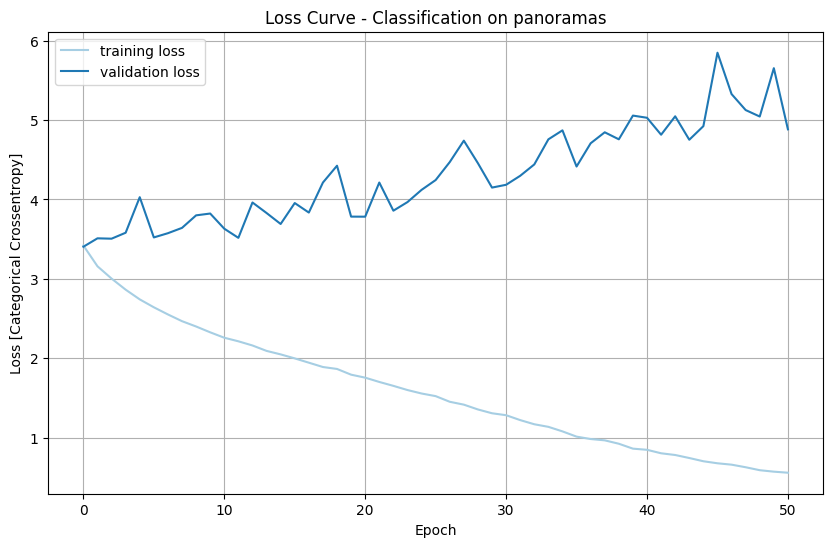

In [29]:
train = df[df.run.str.endswith("inception_network_1.2_catcross/train")&(df.tag == "epoch_loss")]
validation = df[df.run.str.endswith("inception_network_1.2_catcross/validation")&(df.tag == "epoch_loss")]
plt.figure(figsize=(10, 6))
sns.lineplot(data=train, x="step", y="value",color=colors[0],label = "training loss")
sns.lineplot(data=validation, x="step", y="value",color=colors[1], label = "validation loss")
plt.title("Loss Curve - Classification on panoramas")
plt.xlabel("Epoch")
plt.ylabel("Loss [Categorical Crossentropy]")
plt.legend()
plt.grid()
#plt.ylim(0,0.5)
plt.savefig("losscurve_class_panos.png",dpi = 400)

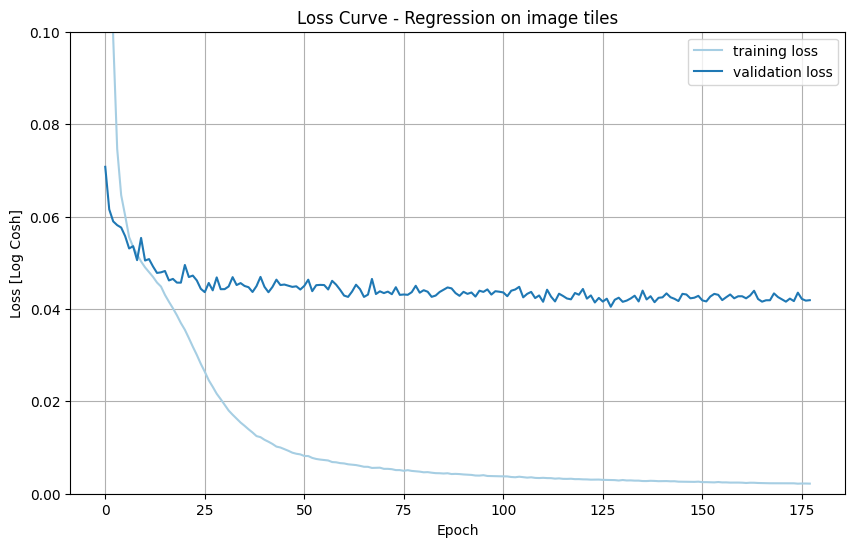

In [28]:
train = df[df.run.str.endswith("inception_network_2.0_norm_small_logcosh/train")&(df.tag == "epoch_loss")]
validation = df[df.run.str.endswith("inception_network_2.0_norm_small_logcosh/validation")&(df.tag == "epoch_loss")]
plt.figure(figsize=(10, 6))
sns.lineplot(data=train, x="step", y="value",color=colors[0],label = "training loss")
sns.lineplot(data=validation, x="step", y="value",color=colors[1], label = "validation loss")
plt.title("Loss Curve - Regression on image tiles")
plt.xlabel("Epoch")
plt.ylabel("Loss [Log Cosh]")
plt.legend()
plt.grid()
plt.ylim(0,0.1)
plt.savefig("losscurve_regress_img_tiles.png",dpi = 400)

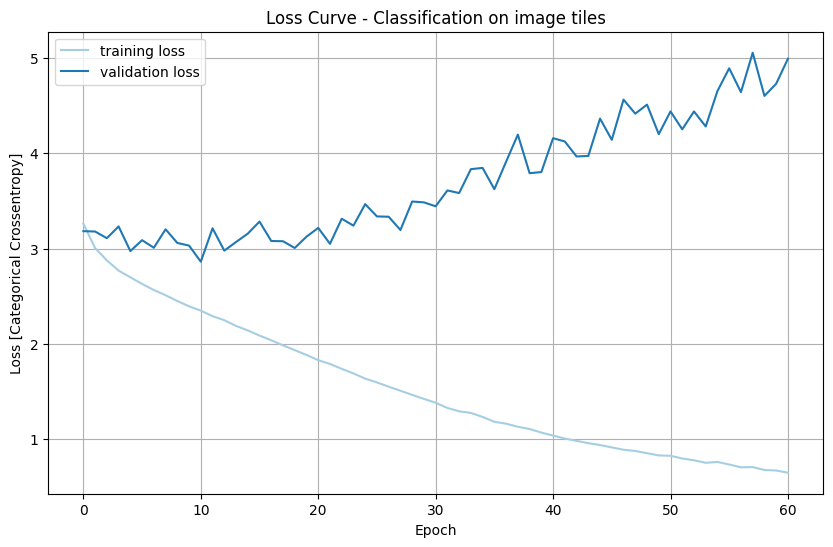

In [27]:
train = df[df.run.str.endswith("inception_network_3.3_catcross/train")&(df.tag == "epoch_loss")]
validation = df[df.run.str.endswith("inception_network_3.3_catcross/validation")&(df.tag == "epoch_loss")]
plt.figure(figsize=(10, 6))
sns.lineplot(data=train, x="step", y="value",color=colors[0],label = "training loss")
sns.lineplot(data=validation, x="step", y="value",color=colors[1], label = "validation loss")
plt.title("Loss Curve - Classification on image tiles")
plt.xlabel("Epoch")
plt.ylabel("Loss [Categorical Crossentropy]")
plt.legend()
plt.grid()
plt.savefig("losscurve_class_img_tiles.png",dpi = 400)